Machine Learning Decision Tree - Atmospheric Data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve, auc
import graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib.legend_handler import HandlerLine2D

In [2]:
#read atmospheric weather csv file
a_data = pd.read_csv('atmospheric_weather_preprocessed.csv')
b_data = pd.read_csv('SAGEMAKER_atmospheric.csv')
a_data.head()

,pressure,temperature,humidity,image
0,200,217.770279,8.306047,0
1,350,239.403473,5.289028,0
2,325,236.103195,4.626761,0
3,300,232.266129,5.750836,0
4,275,228.088684,5.880545,0


In [3]:
#identify variables
X = np.array(a_data.iloc[:,0:3])
Y = np.array(a_data['image'])

In [4]:
#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30)

In [5]:
#preform decision tree classifier
a_dt_c = tree.DecisionTreeClassifier()
a_dt_c.fit(X_train, Y_train)
pred = a_dt_c.predict(X_test)

In [6]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test,pred)

roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC AUC: ', roc_auc)

ROC AUC:  0.514299876777838


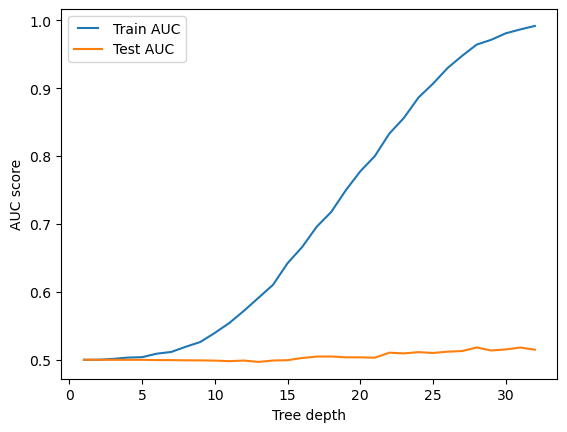

In [7]:
max_depths = np.arange(1, 33)

train_results = []
test_results = []

for max_depth in max_depths:
    a_dt_c = tree.DecisionTreeClassifier(max_depth=max_depth) 
    a_dt_c.fit(X_train, Y_train)
    
    train_pred = a_dt_c.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    test_pred = a_dt_c.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, label="Train AUC")
line2, = plt.plot(max_depths, test_results, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

In [8]:
a_dt_c = tree.DecisionTreeClassifier()
a_dt_c.fit(X_train, Y_train)
pred = a_dt_c.predict(X_test)

In [9]:
#show results
print('Accuracy Score: ', accuracy_score(Y_test,pred))

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test,pred)

roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC AUC: ', roc_auc)

Accuracy Score:  0.9325930255211378
ROC AUC:  0.5141484992422642


Text(113.9222222222222, 0.5, 'Predicted')

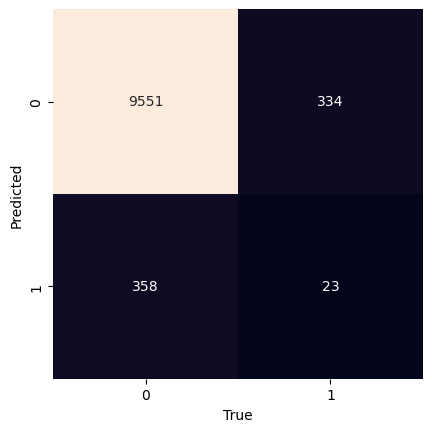

In [10]:
a_mat = confusion_matrix(Y_test, pred)
sns.heatmap(a_mat.T, square=True, annot=True, fmt='d',cbar=False)
plt.xlabel('True')
plt.ylabel('Predicted')

In [11]:
print(metrics.classification_report(pred,Y_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9885
           1       0.06      0.06      0.06       381

    accuracy                           0.93     10266
   macro avg       0.51      0.51      0.51     10266
weighted avg       0.93      0.93      0.93     10266



In [12]:
#transfer decision tree into visual
export_graphviz(a_dt_c, out_file='Atmospheric_Weather_Decision_Tree.dot')

In [13]:
x = np.array(b_data.iloc[:,0:2])
y = np.array(b_data['image'])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30)

In [15]:
b_dt_c = tree.DecisionTreeClassifier()
b_dt_c.fit(x_train, y_train)
pred = b_dt_c.predict(x_test)

In [16]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)

roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC AUC: ', roc_auc)

ROC AUC:  0.8479284755880501


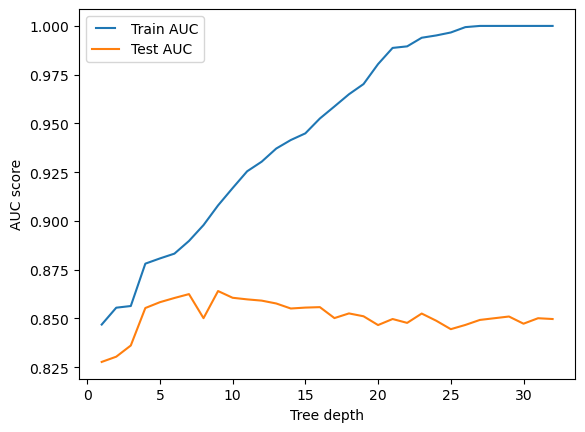

In [17]:
max_depths = np.arange(1, 33)

train_results = []
test_results = []

for max_depth in max_depths:
    b_dt_c = tree.DecisionTreeClassifier(max_depth=max_depth) 
    b_dt_c.fit(x_train, y_train)
    
    train_pred = b_dt_c.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    test_pred = b_dt_c.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, label="Train AUC")
line2, = plt.plot(max_depths, test_results, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

In [18]:
b_dt_c = tree.DecisionTreeClassifier(max_depth=5)
b_dt_c.fit(x_train, y_train)
pred = b_dt_c.predict(x_test)

In [19]:
print('Accuracy Score: ', accuracy_score(y_test,pred))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)

roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC AUC: ', roc_auc)

Accuracy Score:  0.9104882459312839
ROC AUC:  0.8583066349023796


Text(113.9222222222222, 0.5, 'Predicted')

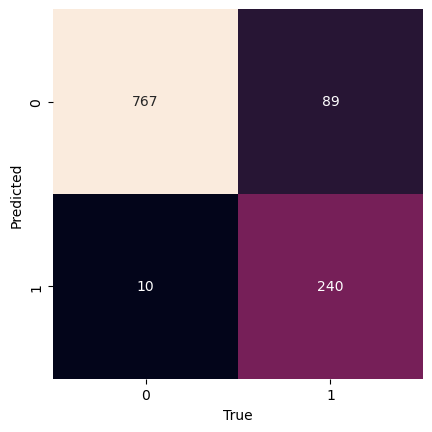

In [20]:
b_mat = confusion_matrix(y_test, pred)
sns.heatmap(b_mat.T, square=True, annot=True, fmt='d',cbar=False)
plt.xlabel('True')
plt.ylabel('Predicted')